In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import datetime as dt

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

In [2]:
# Loading in dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRCo-p1dxFKj7TB0tCvpDW_Vi50Ah3XmfEaqt2-PWRTZGnrdQMpfp6naarkMNm_d-ufMlJ1HoE_00kW/pub?output=csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [3]:
# Looking at the df info
df.info() # date is an int type, so we need to change to datetime fmt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
# Creating datetime format and testing
fmt = "%Y%m%d"
today_datetime = dt.datetime.today()
today_datetime.strftime(fmt)

'20230301'

In [5]:
# Make a datetime index using pd.to_datetime & specifying the format
df['date'] = pd.to_datetime(df['date'], format = fmt)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [6]:
# Setting the new datetime column to the index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [7]:
# Filtering required data
df1 = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [8]:
# Checking for na
df1.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
# Interpolating temperature measures
df1['mean_temp'] = df1['mean_temp'].interpolate()
df1['max_temp'] = df1['max_temp'].interpolate()
df1['min_temp'] = df1['min_temp'].interpolate()

In [10]:
# Filling preciptation/snow with 0
df1['precipitation'] = df1['precipitation'].fillna(0)
df1['snow_depth'] = df1['snow_depth'].fillna(0)

In [11]:
df1.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Q1: What month had the most precipitation between 2000 through 2010?

In [12]:
precip_cols = ['precipitation']
precip_df = df1.loc["2000":"2010",precip_cols]
precip_df

,precipitation
date,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80
...,...
2010-12-27,5.00
2010-12-28,0.40
2010-12-29,1.40


In [13]:
# Save timestamp of highest precipitation
idx_max_precip = precip_df.idxmax()
idx_max_precip

precipitation   2000-10-29
dtype: datetime64[ns]

In [14]:
# Seeing how much precipitation there was on the highest day
precip_df.loc['2000-10-29']

precipitation   36.60
Name: 2000-10-29 00:00:00, dtype: float64

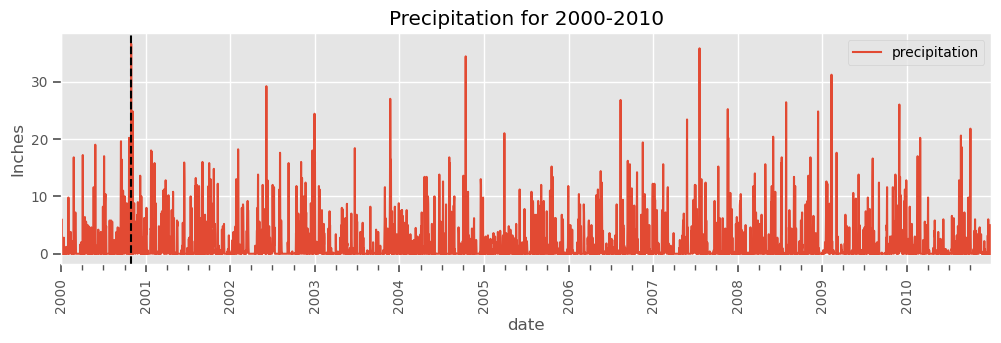

In [15]:
# Vizualizing the precipitation
fig, ax = plt.subplots(figsize=(12,3))
precip_df.plot(ax=ax)
ax.set( title='Precipitation for 2000-2010',
      ylabel='Inches')
ax.axvline('October 29, 2000', color='k', linestyle='--', label='October 2000, 36.60')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)




## Final xdate tweaks
fig = ax.get_figure()
ax.tick_params(axis='x', labelrotation=90)

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [21]:
ts = df1['min_temp'].copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [23]:
ts_A = ts.resample("A").mean()
ts_A.name = 'Resampled'
ts_A.head()


date
2000-12-31   8.00
2001-12-31   7.65
2002-12-31   8.43
2003-12-31   7.90
2004-12-31   8.23
Freq: A-DEC, Name: Resampled, dtype: float64

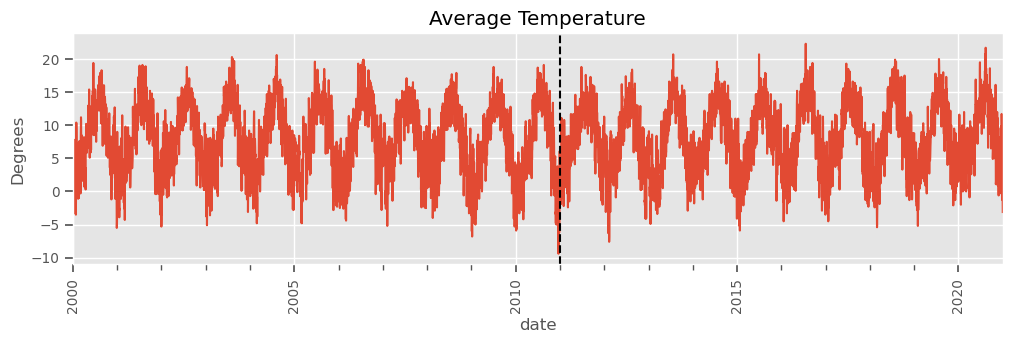

In [27]:
# Vizualizing the precipitation
fig, ax = plt.subplots(figsize=(12,3))
ts.plot(ax=ax)
ax.set(title='Average Temperature',
      ylabel='Degrees')
ax.axvline(ts_A.idxmin(), color='k', linestyle='--', label='Coldest average temperature')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)




## Final xdate tweaks
fig = ax.get_figure()
ax.tick_params(axis='x', labelrotation=90)